# Choosing optimal number of bins by MSE

In [1]:
import pandas as pd
all_chunk = pd.read_csv('~/data0118/joined_smpl/domain_GO_smpl_rm_plasmid')
score = 'weighted_mutual'

In [2]:
all_chunk.shape

(1000000, 5)

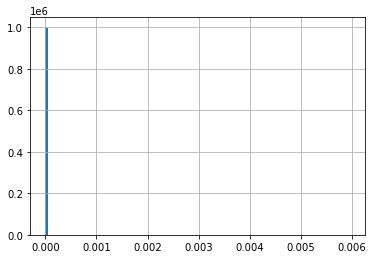

In [3]:
all_chunk[score].hist(bins = 100)

In [4]:
all_chunk[score].max()

0.0059620640476961435

In [5]:
# drop bottom values
bottom = all_chunk[score].min() + (all_chunk[score].max() - all_chunk['weighted_mutual'].min())*0.05
drop_bottom_two_bins = (all_chunk.loc[all_chunk[score]>bottom])

In [6]:
drop_bottom_two_bins.shape

(380, 5)

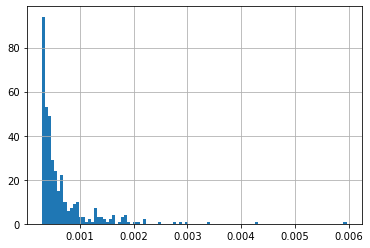

In [7]:
drop_bottom_two_bins[score].hist(bins = 100)

In [8]:
def evaluate_fitting(lls_score, new_lls):
    ''' return MSE between fit and original score'''
    return np.sum((lls_score.values - new_lls.values)**2)/len(lls_score)

3.5181242566124613


/home/hermuba/miniconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/hermuba/miniconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/hermuba/miniconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


3.8193870889323756
4.081544060358606
4.45527739121649
4.939284228207673
5.5195970883787915
5.5377726722102825
5.565295911097788
5.5718276687912915
5.562095436361588
5.582802442264155
5.552901243005603
5.453301101547727
5.598047105191355
5.605392859885262
5.640970876656172
5.602468233348996


Text(0.5, 1.0, 'Determine optimal number of bins')

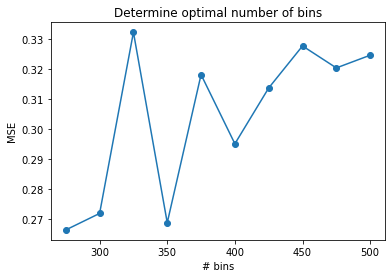

In [31]:
from Genome.goldstandard_pair.lls import *
import numpy as np
import matplotlib.pyplot as plt
bin_to_try = list(np.arange(100,525, 25))
mse = []
for b in bin_to_try:
    
    lls_score = lls_for_domain(all_chunk, score, bins = b)
    
    print(lls_score.max())
    
    if lls_score.max()>=3:
    
        true_thres, slope, intercept = lls_regress_thres(lls_score)
    
        new_lls = map_lls(lls_score, true_thres, slope, intercept)
        mse.append(evaluate_fitting(lls_score, new_lls))
    else:
        mse.append(None)
    
plt.plot(bin_to_try, mse, '-o')
plt.xlabel('# bins')
plt.ylabel('MSE')


plt.title('Determine optimal number of bins')

In [10]:
%matplotlib inline

def wrap_for_diff_score(score, all_chunk, bins = 300):
    lls_score = lls_for_domain(all_chunk, score, bins = bins)
    print(lls_score.max())
    true_thres, slope, intercept = lls_regress_thres(lls_score)
    new_lls = map_lls(lls_score, true_thres, slope, intercept)
    all_chunk = map_score_to_lls(all_chunk, new_lls, score)
    tradeoff = try_diff_lls_thres(all_chunk)
    return(new_lls, all_chunk,lls_score, tradeoff, true_thres)

In [11]:
new_lls, all_chunk,lls_score, tradeoff, true_thres = wrap_for_diff_score(score, all_chunk)

5.5718276687912915


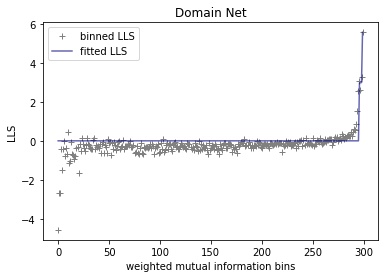

In [30]:
plt.plot(lls_score, '+', label = 'binned LLS', color = 'grey')
plt.plot(new_lls, '-', label = 'fitted LLS', color = 'navy', alpha = 0.6)

plt.title('Domain Net')
plt.xlabel('weighted mutual information bins')
plt.ylabel('LLS')
plt.legend()

In [21]:
all_chunk.loc[all_chunk['lls']>3]

,Unnamed: 0,gene_one,gene_two,goldstandard,weighted_mutual,cut_mutual,lls,ans
24,24,562.10576.con.0002_214|562.10576,562.22520.con.0081_4|562.22520,0,0.000122,"(3.74e-05, 0.00596]",5.573402,False
29,29,562.10576.con.0002_214|562.10576,562.22588.con.0052_3|562.22588,0,0.000057,"(3.74e-05, 0.00596]",5.573402,False
809,317,562.10576.con.0005_122|562.10576,562.22715.con.0018_65|562.22715,1,0.000214,"(3.74e-05, 0.00596]",5.573402,False
1711,287,562.10576.con.0005_118|562.10576,562.23322.con.0003_75|562.23322,1,0.000086,"(3.74e-05, 0.00596]",5.573402,False
1770,346,562.10576.con.0005_122|562.10576,562.23322.con.0003_75|562.23322,1,0.000352,"(3.74e-05, 0.00596]",5.573402,False
...,...,...,...,...,...,...,...,...
999157,66,JMUY01000009_5|1438670.3,JMVW01000033_15|1438696.3,0,0.000222,"(3.74e-05, 0.00596]",5.573402,False
999350,259,JMUY01000015_3|1438670.3,JMUY01000019_16|1438670.3,1,0.000131,"(3.74e-05, 0.00596]",5.573402,False
999751,146,JMVP01000027_274|1438687.3,MPCP01000004_129|562.12959,1,0.000053,"(3.74e-05, 0.00596]",5.573402,False
999873,268,JMVW01000011_13|1438696.3,MPCO01000001_2180|562.12960,1,0.000179,"(3.74e-05, 0.00596]",5.573402,False


In [19]:
sum(all_chunk['lls']>3)

3343